<table class="table table-bordered">
    <tr>
        <th style="width:300px;">
            <img src='./images/RISE_FFS_2_Light BG@4x.png' style="background-color:white; width: 100%; height: 100%; padding: 20px">
        </th>
        <th style="text-align:center;">
            <h1>M1 Assessment (AI Track)</h1>
            <h2>Computational Modelling - Statistics</h2>
            <h3>IBF TFIP</h3>
        </th>
    </tr>
</table>

## Know the context

You are a data scientist in a major health insurance provider in the US. They are looking to build a claims fraud detection model in a bid to make claims processing faster, more accurate, and automated.


## Business problem

1. Existing manual methods of reviewing claims for fraud is tedious, unscalable, and lacks accuracy
2. Rule-based fraud detection methods are rigid and less readily adaptable to drifts in fraud patterns

## Project objectives and description

Explore the implementation of several common statistical tests (using scipy.stats) as part of the insurer's preliminary investigation into reports of potential fraudulent healthcare claims. 


### Initial Setup

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
from scipy import stats

In [28]:
# Read the five datasets (CSV files)
encounters = pd.read_csv("./Data/encounters.csv")
claims = pd.read_csv("./Data/claims.csv")
organizations = pd.read_csv("./Data/organizations.csv")
patients = pd.read_csv("./Data/patients.csv")
providers = pd.read_csv("./Data/providers.csv")

___
### Part 1 - Individual Provider
- There have been rumours that a specific provider with the ID "bb49afa2-3d8a-306c-a06e-a1715dd71af8" is overbilling treatments for patients, resulting in allegedly excessive claim costs. In particular, the provider has been accused of having an average total claim cost that is significantly higher than other providers of the same specialty i.e., General Practice.
- Our task is to identify the provider based on his/her details, and verify whether this accusation is true.

#### (1.1) Details (e.g., name, organization, gender etc.) of the provider.

In [14]:
# insert your code here:
providers.loc[providers.ID == "bb49afa2-3d8a-306c-a06e-a1715dd71af8",:]

,ID,ORGANIZATION,NAME,GENDER,SPECIALITY,ADDRESS,CITY,STATE
46,bb49afa2-3d8a-306c-a06e-a1715dd71af8,226098a2-6a40-3588-b5bb-db56c3a30a04,Hal307 Renner328,M,GENERAL PRACTICE,235 NORTH PEARL STREET,BROCKTON,MA


##### Hypotheses:
- **Null hypothesis H<sub>0</sub>**: The average total claim cost for the accused provider = The average total claim cost for other providers of the same specialty
- **Alternative hypothesis H<sub>a</sub>**: The average total claim cost for the accused provider > The average total claim cost for other providers of the same specialty

#### (1.3) Providers information involved in each encounter. 

In [15]:
# insert your code here:
enc_prov = pd.merge(encounters, providers,left_on = 'PROVIDER', right_on = 'ID', how = 'left')
enc_prov.drop(columns = ['ID_y', 'ORGANIZATION_y'], inplace = True)
new_names = {'ID_x': 'ID', 'ORGANIZATION_x': 'ORGANIZATION'}
enc_prov.rename(columns = new_names, inplace = True)
enc_prov

,ID,START,STOP,PATIENT,ORGANIZATION,PROVIDER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,NAME,GENDER,SPECIALITY,ADDRESS,CITY,STATE
0,c8eaaf41-958b-31ab-7de5-568cee8751f3,27/11/2016 17:20,27/11/2016 17:35,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,24cb4eab-6166-3530-bddc-a5a8a14a4fc1,e2d3a787-83d4-3bd9-a769-753b3285078d,ambulatory,C185345009,Encounter for symptom,77.49,77.49,Wilton999 Pollich983,M,GENERAL PRACTICE,14 PROSPECT STREET,MILFORD,MA
1,6474f606-5a1b-48c0-bbbf-ad6dcbc24d4e,22/2/2017 8:52,22/2/2017 9:52,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,24cb4eab-6166-3530-bddc-a5a8a14a4fc1,e2d3a787-83d4-3bd9-a769-753b3285078d,emergency,C50849002,Emergency room admission (procedure),129.16,1162.46,Wilton999 Pollich983,M,GENERAL PRACTICE,14 PROSPECT STREET,MILFORD,MA
2,7eab9841-6b96-3c2f-d7f8-fc14a8810e68,2/6/2017 9:25,2/6/2017 9:40,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,24cb4eab-6166-3530-bddc-a5a8a14a4fc1,e2d3a787-83d4-3bd9-a769-753b3285078d,ambulatory,C185349003,Encounter for 'check-up',77.49,77.49,Wilton999 Pollich983,M,GENERAL PRACTICE,14 PROSPECT STREET,MILFORD,MA
3,676b26cf-85c1-60d8-b4b2-ed9b34d5b3a7,24/7/2017 8:20,24/7/2017 8:35,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,620d4a8a-ef3b-30c4-9c58-a409e8f3b7f1,6240e34b-f1a6-374d-af15-dea26341ba2e,wellness,C410620009,Well child visit (procedure),129.16,926.85,Dolores502 Valdivia496,F,GENERAL PRACTICE,13 MECHANIC ST,BELLINGHAM,MA
4,68e737e5-a4a1-0ffd-7234-8fb04a2b0c19,23/6/2021 8:20,23/6/2021 8:35,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,24cb4eab-6166-3530-bddc-a5a8a14a4fc1,e2d3a787-83d4-3bd9-a769-753b3285078d,outpatient,C698314001,Consultation for treatment,129.16,4086.94,Wilton999 Pollich983,M,GENERAL PRACTICE,14 PROSPECT STREET,MILFORD,MA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,f60aa3dc-a861-a3c7-6f4d-2bd58f7d973d,21/12/2011 5:11,21/12/2011 5:26,cb1b2c74-d1c5-997c-6f8b-20ca9f332eef,4861d01f-019c-3dac-a153-8334e50919f9,b0c5743a-4f9a-33b3-bab4-6a474fcf9ffd,ambulatory,C390906007,Follow-up encounter,77.49,77.49,Ellan282 Jacobi462,F,GENERAL PRACTICE,81 HIGHLAND AVENUE,SALEM,MA
5096,88288c66-1201-390a-a309-d70caf3366e0,19/12/2017 5:11,19/12/2017 5:26,cb1b2c74-d1c5-997c-6f8b-20ca9f332eef,4861d01f-019c-3dac-a153-8334e50919f9,b0c5743a-4f9a-33b3-bab4-6a474fcf9ffd,ambulatory,C390906007,Follow-up encounter,77.49,77.49,Ellan282 Jacobi462,F,GENERAL PRACTICE,81 HIGHLAND AVENUE,SALEM,MA
5097,54d4b63d-e397-ce54-7fd8-5b95848df927,29/12/2017 5:11,29/12/2017 5:26,cb1b2c74-d1c5-997c-6f8b-20ca9f332eef,cd300275-3f4d-3adb-98aa-4e5bba25be24,7cd691a9-0e34-351a-918d-af3f6d3c0279,wellness,C162673000,General examination of patient (procedure),129.16,1295.48,Lourie532 West559,F,GENERAL PRACTICE,990 PARADISE RD,SWAMPSCOTT,MA
5098,b171a750-d9a0-f87c-f463-ca8a11ce99e8,21/6/2018 5:51,21/6/2018 6:51,cb1b2c74-d1c5-997c-6f8b-20ca9f332eef,4861d01f-019c-3dac-a153-8334e50919f9,b0c5743a-4f9a-33b3-bab4-6a474fcf9ffd,emergency,C50849002,Emergency room admission (procedure),129.16,129.16,Ellan282 Jacobi462,F,GENERAL PRACTICE,81 HIGHLAND AVENUE,SALEM,MA


#### (1.4) Average total claim cost for the GENERAL PRACTICE speciality (and assign the value to a variable)

In [18]:
# insert your code here:
gp_encprov = enc_prov.loc[enc_prov['SPECIALITY'] == 'GENERAL PRACTICE', :]
avg_total = gp_encprov['TOTAL_CLAIM_COST'].mean()
avg_total

2882.3099490196078

#### (1.5) Sample t-test by using the corresponding scipy function to execute the test. 


In [22]:
# insert your code here:
acc_enc = gp_encprov.loc[gp_encprov['PROVIDER'] == 'bb49afa2-3d8a-306c-a06e-a1715dd71af8', :]
t_stat, p_val = stats.ttest_1samp(acc_enc['TOTAL_CLAIM_COST'], avg_total, alternative = 'greater')
print(f"t-stat: {t_stat}")
print(f"p-value: {p_val}")

t-stat: 1.2873535070622528
p-value: 0.10149919904693568


##### Conclusion(s): 
- At a 95% confidence level, the p-value is higher than the significance level of 0.05
- Therefore, we fail to reject the null hypothesis, and conclude that the average total claim cost for the accused provider = the average total claim cost for other providers of the same specialty.

___
### Part 2 - Two organizations
- There are two organizations with similar profiles (types of patients seen, location etc.) for which we want to test whether the total claim costs between them are indeed similar as well. 
- The IDs of the two organizations are "226098a2-6a40-3588-b5bb-db56c3a30a04" and "108ccece-277a-396f-8bf2-1527f74458eb"

#### (2.1) State the null hypothesis and alternative hypothesis (Provide answers in free text).

HINT: Consider whether this is a one-tailed or two-tailed test

##### Enter your hypotheses here:

- **Null hypothesis H<sub>0</sub>**: Total claim costs between the two are similar
- **Alternative hypothesis H<sub>a</sub>**: Total claim costs between the two are not similar

#### (2.2) Details (name, address etc.) of the two organizations as a single output DataFrame

In [44]:
# insert your code here:
two = providers.loc[providers['ORGANIZATION'].isin(['226098a2-6a40-3588-b5bb-db56c3a30a04','108ccece-277a-396f-8bf2-1527f74458eb']),:]
two

,ID,ORGANIZATION,NAME,GENDER,SPECIALITY,ADDRESS,CITY,STATE
46,bb49afa2-3d8a-306c-a06e-a1715dd71af8,226098a2-6a40-3588-b5bb-db56c3a30a04,Hal307 Renner328,M,GENERAL PRACTICE,235 NORTH PEARL STREET,BROCKTON,MA
5048,23bf510d-5676-3add-a24b-44ec5d8ac145,108ccece-277a-396f-8bf2-1527f74458eb,Eda506 Marvin195,F,GENERAL PRACTICE,51 LOCUST STREET,NORTHAMPTON,MA


#### (2.3) What is the name of the CITY that these two organizations are based in?

Brockton and Northampton

#### (2.4) Total claim costs for each organization

In [91]:
# insert your code here:
brock_total = encounters.loc[encounters['ORGANIZATION'] == '226098a2-6a40-3588-b5bb-db56c3a30a04', :].TOTAL_CLAIM_COST
north_total = encounters.loc[encounters['ORGANIZATION'] == '108ccece-277a-396f-8bf2-1527f74458eb', :].TOTAL_CLAIM_COST

#### (2.5) Two-sample independent t-test (using the appropriate scipy function)

In [92]:
# insert your code here:
t_stat, p_value = stats.ttest_ind(brock_total, north_total)
print(f"t-stat: {t_stat}")
print(f"p-value: {p_value}")

t-stat: 0.39771000475581114
p-value: 0.6922100176419317


/Users/elizabethteo/Library/Python/3.9/lib/python/site-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


#### (2.6) Conclusion

- At a 95% confidence level, the p-value is higher than the significance level of 0.05
- Therefore, we fail to reject the null hypothesis, and conclude that the average total claim costs between the two organizations are similar

___
### Part 3 - More than two organizations

- The insurer is now keen to review the average total claim costs of PCPs (private clinical practices) within a particular set of cities, and to see if one or more of them has a significantly different (higher or lower) average dollar cost from the rest
- The set of cities include **AVON** and **WATERTOWN**.

#### (3.1) Organization information involved in each encounter. 

In [68]:
# insert your code here
enc_org = pd.merge(encounters, organizations[['ID', 'NAME', 'CITY']],left_on = 'ORGANIZATION', right_on = 'ID', how = 'left')
enc_org.drop(columns = 'ID_y', inplace = True)
col_names = {'ID_x': 'ID'}
enc_org.rename(columns = new_names, inplace = True)
enc_org

,ID,START,STOP,PATIENT,ORGANIZATION,PROVIDER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,NAME,CITY
0,c8eaaf41-958b-31ab-7de5-568cee8751f3,27/11/2016 17:20,27/11/2016 17:35,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,24cb4eab-6166-3530-bddc-a5a8a14a4fc1,e2d3a787-83d4-3bd9-a769-753b3285078d,ambulatory,C185345009,Encounter for symptom,77.49,77.49,MILFORD REGIONAL MEDICAL CENTER,MILFORD
1,6474f606-5a1b-48c0-bbbf-ad6dcbc24d4e,22/2/2017 8:52,22/2/2017 9:52,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,24cb4eab-6166-3530-bddc-a5a8a14a4fc1,e2d3a787-83d4-3bd9-a769-753b3285078d,emergency,C50849002,Emergency room admission (procedure),129.16,1162.46,MILFORD REGIONAL MEDICAL CENTER,MILFORD
2,7eab9841-6b96-3c2f-d7f8-fc14a8810e68,2/6/2017 9:25,2/6/2017 9:40,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,24cb4eab-6166-3530-bddc-a5a8a14a4fc1,e2d3a787-83d4-3bd9-a769-753b3285078d,ambulatory,C185349003,Encounter for 'check-up',77.49,77.49,MILFORD REGIONAL MEDICAL CENTER,MILFORD
3,676b26cf-85c1-60d8-b4b2-ed9b34d5b3a7,24/7/2017 8:20,24/7/2017 8:35,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,620d4a8a-ef3b-30c4-9c58-a409e8f3b7f1,6240e34b-f1a6-374d-af15-dea26341ba2e,wellness,C410620009,Well child visit (procedure),129.16,926.85,POSTUM EYE CARE INC,BELLINGHAM
4,68e737e5-a4a1-0ffd-7234-8fb04a2b0c19,23/6/2021 8:20,23/6/2021 8:35,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,24cb4eab-6166-3530-bddc-a5a8a14a4fc1,e2d3a787-83d4-3bd9-a769-753b3285078d,outpatient,C698314001,Consultation for treatment,129.16,4086.94,MILFORD REGIONAL MEDICAL CENTER,MILFORD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,f60aa3dc-a861-a3c7-6f4d-2bd58f7d973d,21/12/2011 5:11,21/12/2011 5:26,cb1b2c74-d1c5-997c-6f8b-20ca9f332eef,4861d01f-019c-3dac-a153-8334e50919f9,b0c5743a-4f9a-33b3-bab4-6a474fcf9ffd,ambulatory,C390906007,Follow-up encounter,77.49,77.49,NORTH SHORE MEDICAL CENTER -,SALEM
5096,88288c66-1201-390a-a309-d70caf3366e0,19/12/2017 5:11,19/12/2017 5:26,cb1b2c74-d1c5-997c-6f8b-20ca9f332eef,4861d01f-019c-3dac-a153-8334e50919f9,b0c5743a-4f9a-33b3-bab4-6a474fcf9ffd,ambulatory,C390906007,Follow-up encounter,77.49,77.49,NORTH SHORE MEDICAL CENTER -,SALEM
5097,54d4b63d-e397-ce54-7fd8-5b95848df927,29/12/2017 5:11,29/12/2017 5:26,cb1b2c74-d1c5-997c-6f8b-20ca9f332eef,cd300275-3f4d-3adb-98aa-4e5bba25be24,7cd691a9-0e34-351a-918d-af3f6d3c0279,wellness,C162673000,General examination of patient (procedure),129.16,1295.48,PCP191696,SWAMPSCOTT
5098,b171a750-d9a0-f87c-f463-ca8a11ce99e8,21/6/2018 5:51,21/6/2018 6:51,cb1b2c74-d1c5-997c-6f8b-20ca9f332eef,4861d01f-019c-3dac-a153-8334e50919f9,b0c5743a-4f9a-33b3-bab4-6a474fcf9ffd,emergency,C50849002,Emergency room admission (procedure),129.16,129.16,NORTH SHORE MEDICAL CENTER -,SALEM


#### (3.2) From the output DataFrame above, filter the data based on the following criteria:
- Name of organization has 'PCP' in it (Hint: Use .str.contains)
- Cities of AVON and WATERTOWN (Hint: Use .isin)

In [75]:
# insert your code here:
fil_data = enc_org.loc[enc_org['NAME'].str.contains('PCP') & enc_org['CITY'].isin(['AVON', 'WATERTOWN']), :]

#### (3.3) From the output above, how many PCPs are we investigating, and what are the names of these PCPs

In [86]:
# insert your code here:
fil_data['NAME'].nunique()

4

There are 4 PCP organizations to be reviewed in Avon and Watertown

##### Hypotheses:

- **Null hypothesis H<sub>0</sub>**: The mean of PCP organizations in Avon and Watertown is equal to the overall mean.
- **Alternative hypothesis H<sub>a</sub>**: At least one PCP organization in Avon and Watertown differs significantly from the overall mean.

#### (3.5) Claim costs for each organization 

In [90]:
# insert your code here:
org = fil_data['NAME'].unique()
PCP1 = fil_data.loc[fil_data['NAME'] == org[0], :].TOTAL_CLAIM_COST
PCP2 = fil_data.loc[fil_data['NAME'] == org[1], :].TOTAL_CLAIM_COST
PCP3 = fil_data.loc[fil_data['NAME'] == org[2], :].TOTAL_CLAIM_COST
PCP4 = fil_data.loc[fil_data['NAME'] == org[3], :].TOTAL_CLAIM_COST

#### (3.6) Based on the context, claim cost variables (from step 3.5) and following assumptions, select and perform the appropriate test (using scipy) to evaluate the hypothesis

Assumptions to be made:
- Samples are independent.
- Each sample is from a normally distributed population.
- Population standard deviations of the groups are all equal (i.e., homoscedasticity)

In [93]:
# insert your code here:
t_stat, p_value = stats.stats.f_oneway(PCP1, PCP2, PCP3, PCP4)
print(f"t-stat: {t_stat}")
print(f"p-value: {p_value}")

t-stat: 6.540424475856285
p-value: 0.0019195709059467696


/var/folders/jz/5l72krd14rz_f5f2cyx94fvm0000gn/T/ipykernel_1280/477977860.py:2: DeprecationWarning: Please use `f_oneway` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  t_stat, p_value = stats.stats.f_oneway(PCP1, PCP2, PCP3, PCP4)


##### Conclusion(s):
- At a 95% confidence level, the p-value is lower than the significance level of 0.05
- Therefore, we reject the null hypothesis, and conclude that at least one PCP organization in Avon and Watertown differs significantly from the overall mean.

___
### Part 4 - Proportions across two providers
- To account for differences in total claim costs across two doctors (i.e., providers), the insurer is looking to test if there is any significant differences in the proportion of encounter classes (e.g., outpatient, inpatient etc.) that they each have to handle.
- The providers to be evaluated are as follows:
  - ID of Provider 1: **b0c5743a-4f9a-33b3-bab4-6a474fcf9ffd** 
  - ID of Provider 2: **fc897c25-b2ee-30c5-a945-d0eb13a1f96e**

#### (4.1) Filter data to the two providers (as a single output DataFrame)
- From the encounters dataset, filter the rows to records belonging to the two providers with the IDs above
- Next, keep only the following columns: `ID`, `PROVIDER`, and `ENCOUNTERCLASS`

In [98]:
# insert your code here:
fil_prov = encounters.loc[encounters['PROVIDER'].isin(['b0c5743a-4f9a-33b3-bab4-6a474fcf9ffd','fc897c25-b2ee-30c5-a945-d0eb13a1f96e']),['ID','PROVIDER','ENCOUNTERCLASS']]

#### (4.2) Cross tabulation table (with totals)

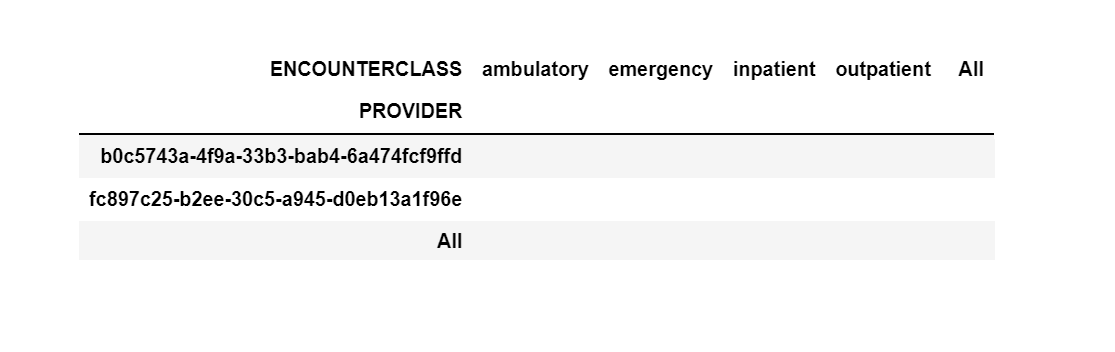

In [113]:
# insert your code here:
df_crosstab = pd.crosstab(fil_prov['PROVIDER'],fil_prov['ENCOUNTERCLASS'], margins = True)

In [114]:
# insert your code here:
df_crosstab.index = ['provider_1', 'provider_2', 'col_total']
df_crosstab.columns = ['ambulatory', 'emergency', 'inpatient', 'outpatient', 'row_total']

In [115]:
# insert your code here:
df_crosstab_cont = df_crosstab.drop(index='col_total', columns='row_total')

##### Hypotheses:

- **Null hypothesis H<sub>0</sub>**: There is no difference in the count frequencies of encounter classes seen by the two providers
- **Alternative hypothesis H<sub>a</sub>**: There is a significant difference in the count frequencies of encounter classes seen by the two providers.

#### (4.5) Chi-square test of independence

In [119]:
# insert your code here:
chi2, pval, dof, expected_obs = stats.chi2_contingency(df_crosstab_cont)
print(f"chisq stat: {chi2} \np-value: {pval} \nDegrees of freedom: {dof} \nExpected_counts:\n {expected_obs}")

chisq stat: 3.9884421134421144 
p-value: 0.26271488055913067 
Degrees of freedom: 3 
Expected_counts:
 [[66.51162791  6.13953488  1.53488372 35.81395349]
 [63.48837209  5.86046512  1.46511628 34.18604651]]


#### (4.6) From the function output above, what is the p-value of the chi-square test of independence?

In [120]:
# insert your code here:
print(f"p-value: {pval}")

p-value: 0.26271488055913067


##### Conclusion:
- At a 95% confidence level, the p-value is higher than the significance level of 0.05
- Therefore, we fail to reject the null hypothesis, and conclude that there is no difference in the count frequencies of encounter classes seen by the two providers.

___